In [1]:
import pandas as pd
import numpy as np
import math
import random
import time
from random import sample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.cluster import SpectralClustering

# 1. Supervised, Semi-Supervised, and Unsupervised Learning
## a)
Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.*

In [3]:
wdbc = pd.read_csv('../data/wdbc.data', header=None)
headers = [str(i) for i in range(-1, len(wdbc.columns)-1)]
headers[0] = "id"
headers[1] = "diagnosis"
wdbc.set_axis(headers, axis=1, inplace=True)
wdbc.drop('id', axis=1, inplace=True)
y = wdbc['diagnosis'].copy()
X = wdbc.drop(['diagnosis'], axis=1)
wdbc

,diagnosis,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## b)
**Monte-Carlo Simulation:** *Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.*

In [26]:
def count_classes(series):
    classes = dict(series.value_counts())
    for key, value in classes.items():
        print(f'{key}: {round((value/len(series))*100, 2)}% or {value} instances')

In [27]:
count_classes(y)

B: 62.74% or 357 instances
M: 37.26% or 212 instances


20% of 357 is ~71

20% of 212 is ~42

In [212]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=60, stratify=y)
count_classes(y_test)

B: 63.16% or 72 instances
M: 36.84% or 42 instances


### i. 
**Supervised Learning:** *Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.*

Accuracy: 92.54%
Recall: 84.92%
Precision: 94.39%
AUC: 90.96%
F1 Score: 0.8932


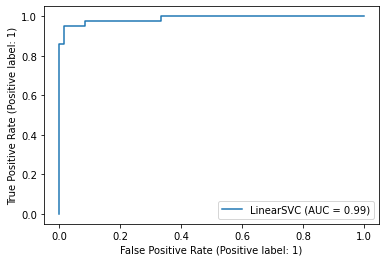

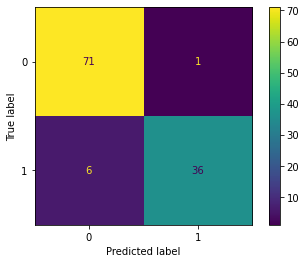

In [213]:
tot_accuracy = tot_recall = tot_precision = tot_auc = tot_f1 = 0

for M in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=M, stratify=y)
    
    # normalize data
    X_train_norm = normalize(X_train)
    X_test_norm  = normalize(X_test)
    y_train = y_train.apply(lambda x: 1 if x == "M" else 0)
    y_test = y_test.apply(lambda x: 1 if x == "M" else 0)

    # train SVM, use 5 fold CV to find optimal penalty (regularization term)
    params = {"C": [.00000001, .0000001, .000001, .00001, .0001, .001, .01, 1, 10, 100], "max_iter": [10000]}
    cv_svm = GridSearchCV(LinearSVC(), param_grid=params, cv=5, n_jobs=-1).fit(X_train_norm, y_train)
    best_penalty = params['C'][np.argmax(cv_svm.cv_results_['mean_test_score'])]

    svm = LinearSVC(C=best_penalty, max_iter=10000).fit(X_train_norm, y_train)
    y_pred = svm.predict(X_test_norm)

    # calculate relevant performance metrics
    tp = sum(y_test & y_pred)
    fp = sum(1-y_test & y_pred) 
    tn = sum(1-y_test & 1-y_pred)
    fn = sum(y_test & 1-y_pred)

    accuracy  = (tp + tn) / (tp+tn+fp+fn)
    recall    = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2*(precision*recall) / (precision+recall)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    tot_accuracy  += accuracy
    tot_recall    += recall
    tot_precision += precision
    tot_auc       += auc
    tot_f1        += f1


avg_accuracy = tot_accuracy / 30
avg_recall = tot_recall / 30
avg_precision = tot_precision / 30
avg_auc = tot_auc / 30
avg_f1 = tot_f1 / 30

print(f'Accuracy: {round(100*avg_accuracy, 2)}%')
print(f'Recall: {round(100*avg_recall, 2)}%')
print(f'Precision: {round(100*avg_precision, 2)}%')
print(f'AUC: {round(100*avg_auc, 2)}%')
print(f'F1 Score: {round(avg_f1, 4)}')

RocCurveDisplay.from_estimator(svm, X_test_norm, y_test)
plt.show()
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()

plt.show()


### ii.
**Semi-Supervised Learning/ Self-training:** *select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.*

In [214]:
def get_remaining_indicies(length, avoid):
    nums = []
    for i in range(length):
        if i not in avoid:
            nums.append(i)
            avoid.append(i)
    return nums

In [215]:
# split data into labeled and unlabeled sets, with labeled having 50% of the positive and negative obsevrations
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=M, stratify=y)

pos_class = X_train[y_train == 'M']
neg_class = X_train[y_train == 'B']

labeled_pos_indicies = random.sample(range(int(len(pos_class))), k=int(.5*len(pos_class)))
labeled_neg_indicies = random.sample(range(int(len(neg_class))), k=int(.5*len(neg_class)))
unlabeled_pos_indicies = get_remaining_indicies(len(pos_class), labeled_pos_indicies.copy())
unlabeled_neg_indicies = get_remaining_indicies(len(neg_class), labeled_neg_indicies.copy())

labeled = pd.concat([pos_class.iloc[labeled_pos_indicies], neg_class.iloc[labeled_neg_indicies]])
unlabeled = pd.concat([pos_class.iloc[unlabeled_pos_indicies], neg_class.iloc[unlabeled_neg_indicies]])

**A.** *Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.*

In [9]:
# train on labeled data

In [216]:
# normalize data
labeled_X = normalize(labeled)
labeled_y = y_train[labeled.index]

labeled_y = labeled_y.apply(lambda x: 1 if x == "M" else 0)

# train SVM, use 5 fold CV to find optimal penalty (regularization parameter)
params = {"C": [.00000001, .0000001, .000001, .00001, .0001, .001, .01, 1, 10, 100, 1000, 10000],
          "max_iter": [10000000], "dual": [False], "penalty": ["l1"]}
cv_svm = GridSearchCV(LinearSVC(), param_grid=params, cv=5, n_jobs=-1).fit(labeled_X, labeled_y)
best_penalty = params['C'][np.argmax(cv_svm.cv_results_['mean_test_score'])]
svm = LinearSVC(C=best_penalty, dual=False, penalty='l1', max_iter=10000000).fit(labeled_X, labeled_y)
print(f'Best penalty parameter: {best_penalty}')

Best penalty parameter: 1000


**B.** *Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs*

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-pack

Training Accuracy: 87.53%
Training Recall: 53.09%
Training Precision: 99.38%
Training AUC: 76.43%
Training F1 Score: 0.6541
Training ROC


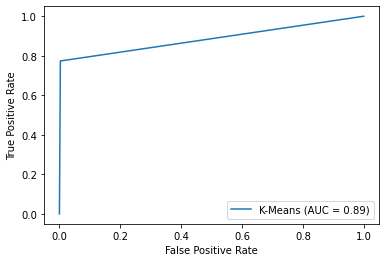

Training Confusion Matrix


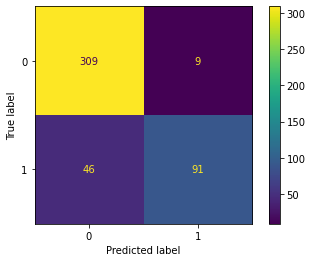

Testing Accuracy: 76.81%
Testing Recall: 37.54%
Testing Precision: 99.01%
Testing AUC: 68.63%
Testing F1 Score: 0.5043
Testing ROC


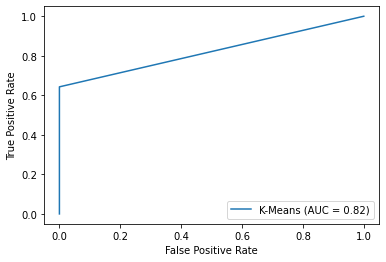

Testing Confusion Matrix


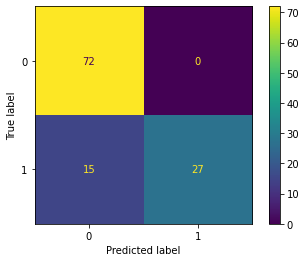

In [255]:
tot_accuracy = tot_recall = tot_precision = tot_auc = tot_f1 = tot_tpr = tot_fpr = 0
test_tot_accuracy=test_tot_recall=test_tot_precision=test_tot_auc=test_tot_f1=test_tot_tpr=test_tot_fpr = 0

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
count = 0
for M in range(30):
    # repeat splitting into labeled and unlabeled
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=M, stratify=y)

    pos_class = X_train[y_train == 'M']
    neg_class = X_train[y_train == 'B']

    labeled_pos_indicies = random.sample(range(int(len(pos_class))), k=int(.5*len(pos_class)))
    labeled_neg_indicies = random.sample(range(int(len(neg_class))), k=int(.5*len(neg_class)))
    unlabeled_pos_indicies = get_remaining_indicies(len(pos_class), labeled_pos_indicies.copy())
    unlabeled_neg_indicies = get_remaining_indicies(len(neg_class), labeled_neg_indicies.copy())

    labeled = pd.concat([pos_class.iloc[labeled_pos_indicies], neg_class.iloc[labeled_neg_indicies]])
    unlabeled = pd.concat([pos_class.iloc[unlabeled_pos_indicies], neg_class.iloc[unlabeled_neg_indicies]])

    y_train = y_train.apply(lambda x: 1 if x == "M" else 0)
    y_test = y_test.apply(lambda x: 1 if x == "M" else 0)

    labeled_X = normalize(labeled)
    labeled_y = y_train[labeled.index]
    
    # train initial SVM with best penalty parameter
    params = {"C": [.001, .01, .1, 1, 10, 100, 1000, 10000],
              "dual": [False], "penalty": ["l1"]}
    cv_svm = GridSearchCV(LinearSVC(), param_grid=params, cv=5, n_jobs=-1).fit(labeled_X, labeled_y)
    svm = LinearSVC(C=best_penalty, dual=False, penalty='l1').fit(labeled_X, labeled_y)
    best_penalty = params['C'][np.argmax(cv_svm.cv_results_['mean_test_score'])]
    svm = LinearSVC(C=best_penalty, dual=False, penalty='l1').fit(labeled_X, labeled_y)

    # iteratively add unlabeled point that's furthest from hyper plane to labeled data
    while len(unlabeled) > 0:
        # find point furthest from hyperplane
        distances = svm.decision_function(unlabeled.to_numpy())
        furthest_index = unlabeled.index[np.absolute(distances).argmax()]
        furthest_point = list(unlabeled.loc[furthest_index])
        
        # predict it's label, add it to the labeled set, remove it from the unlabeled set
        point_pred = svm.predict(np.asarray(furthest_point).reshape(1, -1))
        y_train.loc[furthest_index] = point_pred[0]
        labeled.loc[furthest_index] = furthest_point
        unlabeled.drop(furthest_index, inplace=True)

        labeled_X = normalize(labeled)
        labeled_y = y_train[labeled.index]
        svm = LinearSVC(C=best_penalty, dual=False, penalty='l1').fit(labeled_X, labeled_y)
        
    # predict using last trained SVM
    train_pred = svm.predict(labeled.to_numpy())
    test_pred = svm.predict(X_test.to_numpy())
    
    # record the training results
    tn, fp, fn, tp = confusion_matrix(y_train[labeled.index], train_pred).ravel()
    accuracy  = (tp + tn) / (tp+tn+fp+fn)
    recall    = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2*(precision*recall) / (precision+recall)
    fpr, tpr, thresholds = roc_curve(y_train[labeled.index], train_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    tot_accuracy  += accuracy
    tot_recall    += recall
    tot_precision += precision
    tot_auc       += auc
    tot_f1        += f1
    
    # record test results
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, test_pred).ravel()
    test_accuracy  = (test_tp + test_tn) / (test_tp+test_tn+test_fp+test_fn)
    test_recall    = test_tp / (test_tp + test_fn)
    test_precision = test_tp / (test_tp + test_fp)
    test_f1        = 2*(test_precision*test_recall) / (test_precision+test_recall)
    test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred, pos_label=1)
    test_auc = metrics.auc(test_fpr, test_tpr)
    
    test_tot_accuracy  += test_accuracy
    test_tot_recall    += test_recall
    test_tot_precision += test_precision
    test_tot_auc       += test_auc
    test_tot_f1        += test_f1
    

# display training results
avg_accuracy = tot_accuracy / 30
avg_recall = tot_recall / 30
avg_precision = tot_precision / 30
avg_auc = tot_auc / 30
avg_f1 = tot_f1 / 30

print(f'Training Accuracy: {round(100*avg_accuracy, 2)}%')
print(f'Training Recall: {round(100*avg_recall, 2)}%')
print(f'Training Precision: {round(100*avg_precision, 2)}%')
print(f'Training AUC: {round(100*avg_auc, 2)}%')
print(f'Training F1 Score: {round(avg_f1, 4)}')

fpr, tpr, thresholds = metrics.roc_curve(y_train[labeled.index], train_pred)
roc_auc = metrics.auc(fpr, tpr)
print('Training ROC')
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='K-Means')
display.plot()
plt.show()

print('Training Confusion Matrix')
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

# display testing results
test_avg_accuracy = test_tot_accuracy / 30
test_avg_recall = test_tot_recall / 30
test_avg_precision = test_tot_precision / 30
test_avg_auc = test_tot_auc / 30
test_avg_f1 = test_tot_f1 / 30

print(f'Testing Accuracy: {round(100*test_avg_accuracy, 2)}%')
print(f'Testing Recall: {round(100*test_avg_recall, 2)}%')
print(f'Testing Precision: {round(100*test_avg_precision, 2)}%')
print(f'Testing AUC: {round(100*test_avg_auc, 2)}%')
print(f'Testing F1 Score: {round(test_avg_f1, 4)}')

test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, test_pred)
test_roc_auc = metrics.auc(test_fpr, test_tpr)
print('Testing ROC')
display = metrics.RocCurveDisplay(fpr=test_fpr, tpr=test_tpr, roc_auc=test_roc_auc, estimator_name='K-Means')
display.plot()
plt.show()

print('Testing Confusion Matrix')
cm = confusion_matrix(y_test, test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()


### iii. 
**Unsupervised Learning:** *Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.*

**A.** *Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?*
- I try to avoid a local minimum by initializing the clusters randomly and initializing each run 100 times. However, I can never be 100% sure that I avoided a local minimum without testing every possible cluster. 

**B.** *Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.*

**C.** *Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data*

- *Note: K-means algorithm does not provide probabilities, so one can use the distances from cluster center and pass them through a softmax to calculate probabilities. Alternatively, one can calculate the ROC curve by varying the threshold for majority polling. Usually, a majority is achieved when t = 50% of the data are in a class. one can vary t and obtain an ROC curve.*

In [4]:
def get_cluster_dists(centroid1, centroid2, observation):
    distance1 = distance2 = 0
    for col in range(len(observation)):
        distance1 += pow(observation[col] - centroid1[col], 2)
        distance2 += pow(observation[col] - centroid2[col], 2)
    
    # supposed to use squared euclidean distance, but square root is monotonic so eh
    distance1 = math.sqrt(distance1)
    distance2 = math.sqrt(distance2)
    
    return distance1, distance2

Training Accuracy: 88.85%
Training Recall: 73.31%
Training Precision: 95.9%
Training AUC: 85.72%
Training F1 Score: 0.8306
Training ROC


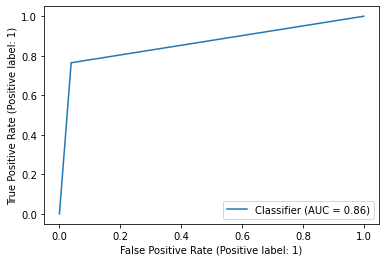

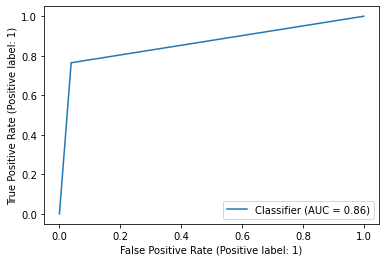

Training Confusion Matrix


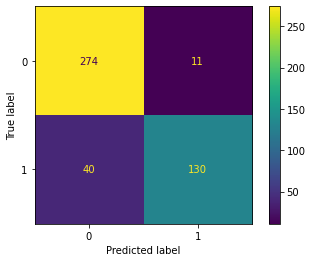

Testing Accuracy: 88.01%
Testing Recall: 70.08%
Testing Precision: 96.41%
Testing AUC: 84.28%
Testing F1 Score: 0.8102
Testing ROC


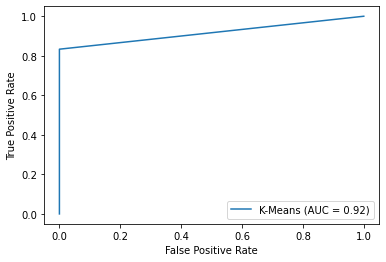

Testing Confusion Matrix


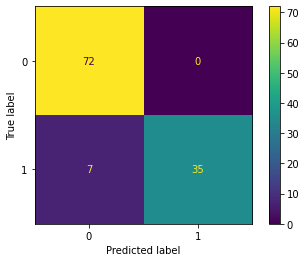

In [10]:
tot_accuracy = tot_recall = tot_precision = tot_auc = tot_f1 = tot_tpr = tot_fpr = 0
test_tot_accuracy=test_tot_recall=test_tot_precision=test_tot_auc=test_tot_f1=test_tot_tpr=test_tot_fpr = 0

for M in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=M, stratify=y)
    train_index = X_train.index
    X_train = pd.DataFrame(normalize(X_train), index=train_index, columns=X_test.columns)
    # find 2 clusters using K means
    kmeans = KMeans(n_clusters=2, random_state=M, init='random', n_init=100, algorithm="full").fit(X_train)
    distances = kmeans.transform(X_train)
    center1 = kmeans.cluster_centers_[0]
    center2 = kmeans.cluster_centers_[1]

    # pick the closest 30 points to each cluster
    obs_to_dist1 = {}
    obs_to_dist2 = {}

    for i, row in X_train.iterrows():
        results = get_cluster_dists(center1, center2, row.copy())
        obs_to_dist1[i] = results[0]
        obs_to_dist2[i] = results[1]
    
    obs_to_dist1 = {k: v for k, v in sorted(obs_to_dist1.items(), key=lambda item: item[1])}
    obs_to_dist2 = {k: v for k, v in sorted(obs_to_dist2.items(), key=lambda item: item[1])}

    cluster1 = pd.DataFrame(columns=X_train.columns)
    cluster2 = pd.DataFrame(columns=X_train.columns)

    for i, (obs, dist) in enumerate(obs_to_dist1.items()):
        if i == 30:
            break
        cluster1.loc[obs] = X_train.loc[obs].copy()

    for i, (obs, dist) in enumerate(obs_to_dist2.items()):
        if i == 30:
            break
        cluster2.loc[obs] = X_train.loc[obs].copy()

    # take majority poll
    cluster1_votes = dict(y_train[cluster1.index].value_counts())
    cluster2_votes = dict(y_train[cluster2.index].value_counts())
    
    vote1 = vote2 = 0
    curr_max = 0

    for key, value in cluster1_votes.items():
        if value > curr_max:
            vote1 = 1 if key == "M" else 0
            curr_max = value
    
    curr_max = 0
    for key, value in cluster2_votes.items():
        if value > curr_max:
            vote2 = 1 if key == "M" else 0
            curr_max = value

    # Classify test data based on their proximity to the centers of the clusters
    y_train = y_train.apply(lambda x: 1 if x == "M" else 0)
    distances = kmeans.transform(X_train)
    y_pred = []
    for obs in distances:
        if obs[0] < obs[1]:
            y_pred.append(vote1)
        else:
            y_pred.append(vote2)
    # note: could have also used kmeans.predict(X_train)...
    
    # record training results
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    accuracy  = (tp + tn) / (tp+tn+fp+fn)
    recall    = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2*(precision*recall) / (precision+recall)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    tot_accuracy  += accuracy
    tot_recall    += recall
    tot_precision += precision
    tot_auc       += auc
    tot_f1        += f1
    tot_fpr       += fpr
    tot_tpr       += tpr
    
    # Classify test data based on their proximity to the centers of the clusters
    y_test = y_test.apply(lambda x: 1 if x == "M" else 0)
    test_index = X_test.index
    X_test = pd.DataFrame(normalize(X_test), index=test_index, columns=X_train.columns)
    distances = kmeans.transform(X_test)
    test_pred = []
    for obs in distances:
        if obs[0] < obs[1]:
            test_pred.append(vote1)
        else:
            test_pred.append(vote2)
    
    # record test results
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, test_pred).ravel()
    test_accuracy  = (test_tp + test_tn) / (test_tp+test_tn+test_fp+test_fn)
    test_recall    = test_tp / (test_tp + test_fn)
    test_precision = test_tp / (test_tp + test_fp)
    test_f1        = 2*(test_precision*test_recall) / (test_precision+test_recall)
    test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred, pos_label=1)
    test_auc = metrics.auc(test_fpr, test_tpr)
    
    test_tot_accuracy  += test_accuracy
    test_tot_recall    += test_recall
    test_tot_precision += test_precision
    test_tot_auc       += test_auc
    test_tot_f1        += test_f1


avg_accuracy = tot_accuracy / 30
avg_recall = tot_recall / 30
avg_precision = tot_precision / 30
avg_auc = tot_auc / 30
avg_f1 = tot_f1 / 30

print(f'Training Accuracy: {round(100*avg_accuracy, 2)}%')
print(f'Training Recall: {round(100*avg_recall, 2)}%')
print(f'Training Precision: {round(100*avg_precision, 2)}%')
print(f'Training AUC: {round(100*avg_auc, 2)}%')
print(f'Training F1 Score: {round(avg_f1, 4)}')

print('Training ROC')
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='K-Means')
display = RocCurveDisplay.from_predictions(y_train, y_pred)
display.plot()
plt.show()

print('Training Confusion Matrix')
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()


test_avg_accuracy = test_tot_accuracy / 30
test_avg_recall = test_tot_recall / 30
test_avg_precision = test_tot_precision / 30
test_avg_auc = test_tot_auc / 30
test_avg_f1 = test_tot_f1 / 30

print(f'Testing Accuracy: {round(100*test_avg_accuracy, 2)}%')
print(f'Testing Recall: {round(100*test_avg_recall, 2)}%')
print(f'Testing Precision: {round(100*test_avg_precision, 2)}%')
print(f'Testing AUC: {round(100*test_avg_auc, 2)}%')
print(f'Testing F1 Score: {round(test_avg_f1, 4)}')

test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, test_pred)
test_roc_auc = metrics.auc(test_fpr, test_tpr)
print('Testing ROC')
display = metrics.RocCurveDisplay(fpr=test_fpr, tpr=test_tpr, roc_auc=test_roc_auc, estimator_name='K-Means')
display.plot()
plt.show()

print('Testing Confusion Matrix')
cm = confusion_matrix(y_test, test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

### iv. 
**Spectral Clustering:** *Repeat 1 (b) iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters.


Training Accuracy: 62.62%
Training Recall: 0.06%
Training Precision: nan%
Training AUC: 50.0%
Training F1 Score: nan
Training ROC


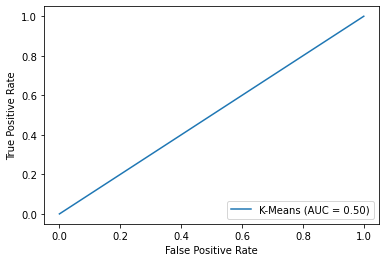

Training Confusion Matrix


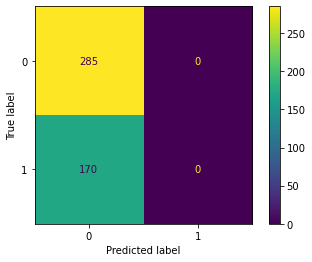

Testing Accuracy: 62.63%
Testing Recall: 0.63%
Testing Precision: nan%
Testing AUC: 49.72%
Testing F1 Score: nan
Testing ROC


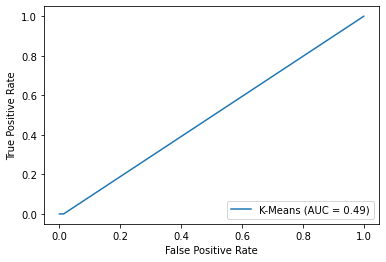

Testing Confusion Matrix


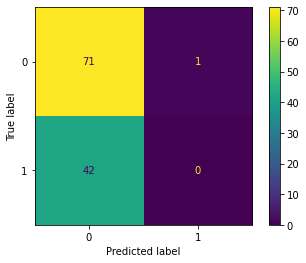

In [250]:
tot_accuracy = tot_recall = tot_precision = tot_auc = tot_f1 = tot_tpr = tot_fpr = 0
test_tot_accuracy=test_tot_recall=test_tot_precision=test_tot_auc=test_tot_f1=test_tot_tpr=test_tot_fpr = 0

for M in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=M, stratify=y)
    
    # find 2 clusters using spectral clustering
    spectral_cluster = SpectralClustering(n_clusters=2, n_init=100, random_state=M, affinity='rbf', gamma=1)
    y_train = y_train.apply(lambda x: 1 if x == "M" else 0)
    y_test = y_test.apply(lambda x: 1 if x == "M" else 0)
    
    # Classify train data
    y_pred = spectral_cluster.fit_predict(X_train)
    
    # record training results
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    accuracy  = (tp + tn) / (tp+tn+fp+fn)
    recall    = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2*(precision*recall) / (precision+recall)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    tot_accuracy  += accuracy
    tot_recall    += recall
    tot_precision += precision
    tot_auc       += auc
    tot_f1        += f1
    
    # Classify test data based on their proximity to the centers of the clusters
    test_pred = spectral_cluster.fit_predict(X_test)

    # record test results
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, test_pred).ravel()

    test_accuracy  = (test_tp + test_tn) / (test_tp+test_tn+test_fp+test_fn)
    test_recall    = test_tp / (test_tp + test_fn)
    test_precision = test_tp / (test_tp + test_fp)
    test_f1        = 2*(test_precision*test_recall) / (test_precision+test_recall)
    test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred, pos_label=1)
    test_auc = metrics.auc(test_fpr, test_tpr)
    
    test_tot_accuracy  += test_accuracy
    test_tot_recall    += test_recall
    test_tot_precision += test_precision
    test_tot_auc       += test_auc
    test_tot_f1        += test_f1


avg_accuracy = tot_accuracy / 30
avg_recall = tot_recall / 30
avg_precision = tot_precision / 30
avg_auc = tot_auc / 30
avg_f1 = tot_f1 / 30

print(f'Training Accuracy: {round(100*avg_accuracy, 2)}%')
print(f'Training Recall: {round(100*avg_recall, 2)}%')
print(f'Training Precision: {round(100*avg_precision, 2)}%')
print(f'Training AUC: {round(100*avg_auc, 2)}%')
print(f'Training F1 Score: {round(avg_f1, 4)}')

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print('Training ROC')
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='K-Means')
display.plot()
plt.show()

print('Training Confusion Matrix')
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()


test_avg_accuracy = test_tot_accuracy / 30
test_avg_recall = test_tot_recall / 30
test_avg_precision = test_tot_precision / 30
test_avg_auc = test_tot_auc / 30
test_avg_f1 = test_tot_f1 / 30

print(f'Testing Accuracy: {round(100*test_avg_accuracy, 2)}%')
print(f'Testing Recall: {round(100*test_avg_recall, 2)}%')
print(f'Testing Precision: {round(100*test_avg_precision, 2)}%')
print(f'Testing AUC: {round(100*test_avg_auc, 2)}%')
print(f'Testing F1 Score: {round(test_avg_f1, 4)}')

test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, test_pred)
test_roc_auc = metrics.auc(test_fpr, test_tpr)
print('Testing ROC')
display = metrics.RocCurveDisplay(fpr=test_fpr, tpr=test_tpr, roc_auc=test_roc_auc, estimator_name='K-Means')
display.plot()
plt.show()

print('Testing Confusion Matrix')
cm = confusion_matrix(y_test, test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

### v. 
*One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.*

**Supervised learning** worked quite well, which is to be expected for classification. It boasts the following metrics:
Accuracy: 92.54%
Recall: 84.92%
Precision: 94.39%
AUC: 90.96%
F1 Score: 0.8932

Since these are medical diagnoses though, we may want to choose hyperparameters on its recall score rather than accuracy. 

**Semi-supervised learning** worked about as well as Kmeans, except its recall was even worse. It stats:
Testing Accuracy: 76.81%
Testing Recall: 37.54%
Testing Precision: 99.01%
Testing AUC: 68.63%
Testing F1 Score: 0.5043


**Kmeans** performed shockingly well in this problem. Its stats:
Testing Accuracy: 85.41%
Testing Recall: 60.63%
Testing Precision: 99.62%
Testing AUC: 80.25%
Testing F1 Score: 0.7524

However, since its recall is so bad, it would be better to use the supervised learning method. We want to minimize the number of false negatives. 

**Spectral Clustering** performed quite poorly and was essentially equivalent to a random classifier. This is probably because the "true" clusters are not nested inside others. 



# 2. Active Learning Using Support Vector Machines

## a)
*Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.*

## b) 
*Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.*

### i. 
**Passive Learning** *Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors.*

In [2]:
banknote_data = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
X_bank = banknote_data.drop([4], axis=1)
y_bank = banknote_data[4]
banknote_data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
def get_new_sample(y_remaining, min_num):
    indexes = sample(list(y_remaining.index), k=10)
    while min(dict(y_remaining[indexes].value_counts()).values()) < 2:
        indexes = sample(list(y_remaining.index), k=10)
    return indexes

In [6]:
test_errors_df = pd.DataFrame(columns=[i for i in range(50)])

for j in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, train_size=900,
                                                        random_state=j, stratify=y_bank)
    total_X_df = pd.DataFrame(columns = X_train.columns)
    total_y_df = pd.DataFrame()
    test_errors = []
    for i in range(90):
        
        # create new training set
        sample_indexes = get_new_sample(y_train, 2)
        total_y_df = pd.concat([total_y_df, y_train.loc[sample_indexes].copy()])
        total_X_df = pd.concat([total_X_df, X_train.loc[sample_indexes].copy()])
        
        # ensure no replacement in the next training set
        X_train.drop(sample_indexes, inplace=True)
        y_train.drop(sample_indexes, inplace=True)
        # do you do anything besides golf and ski keystone?
        # 
        # CV model
        params = {"C": [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000], 'penalty': ['l1'], "loss": ['squared_hinge'],
                 'dual': [False], 'max_iter': [1000000]}
        svm_cv = GridSearchCV(LinearSVC(), param_grid=params, n_jobs=-1)
        svm_cv.fit(total_X_df, total_y_df.to_numpy().ravel())
        best_C = params['C'][np.argmax(svm_cv.cv_results_['mean_test_score'])]

        # record test error with best penalty
        svm = LinearSVC(C=best_C, penalty='l1', random_state=i, loss="squared_hinge", dual=False, max_iter=1000000)
        svm.fit(total_X_df, total_y_df.to_numpy().ravel())

        y_pred = svm.predict(X_test)
        test_error = mean_squared_error(y_test.to_numpy().ravel(), y_pred.ravel())
        test_errors.append(test_error)
    test_errors_df[j] = test_errors

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 me

### ii.
**Active Learning:** *Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.*

In [33]:
test_errors_df2 = pd.DataFrame(columns=[i for i in range(50)])

for j in range(50):
    test_errors = []
    tot_test_error = 0
    X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, train_size=900, 
                                                        random_state=j, stratify=y_bank)
    total_X = pd.DataFrame(columns = X_train.columns)
    total_y = pd.DataFrame()
    
    sample_indexes = get_new_sample(y_train, 2)
    total_y = pd.concat([total_y, y_train.loc[sample_indexes].copy()])
    total_X = pd.concat([total_X, X_train.loc[sample_indexes].copy()])
    
    X_train.drop(sample_indexes, inplace=True)
    y_train.drop(sample_indexes, inplace=True)

    # CV model
    params = {"C": [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000], 'penalty': ['l1'], "loss": ['squared_hinge'],
             'dual': [False], 'max_iter': [1000000]}
    svm_cv = GridSearchCV(LinearSVC(), param_grid=params, n_jobs=-1)
    svm_cv.fit(total_X, total_y.to_numpy().ravel())

    best_C = params['C'][np.argmax(svm_cv.cv_results_['mean_test_score'])]

    # record test error with best penalty 
    svm = LinearSVC(C=best_C, penalty='l1', random_state=60, loss="squared_hinge", dual=False, max_iter=1000000)
    svm.fit(total_X, total_y.to_numpy().ravel())

    y_pred = svm.predict(X_test)
    test_error = mean_squared_error(y_test.to_numpy().ravel(), y_pred.ravel())
    test_errors.append(test_error)
    
    for i in range(89):
        
        # create new training set
        distances = svm.decision_function(X_train)
        closest_indexes = np.argpartition(distances, -10)[-10:]
        closest_points = X_train.iloc[closest_indexes].copy()
        total_X = pd.concat([total_X, closest_points])
        total_y = pd.concat([total_y, y_train.iloc[closest_indexes]])
        
        # ensure no replacement in the next training set
        real_indexes = []
        for i in closest_indexes:
            real_indexes.append(X_train.index[i])
        
        X_train.drop(real_indexes, inplace=True)
        y_train.drop(real_indexes, inplace=True)
        
        # CV model
        params = {"C": [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000], 'penalty': ['l1'], "loss": ['squared_hinge'],
                 'dual': [False], 'max_iter': [1000000]}
        svm_cv = GridSearchCV(LinearSVC(), param_grid=params, n_jobs=-1)
        svm_cv.fit(total_X, total_y.to_numpy().ravel())
        # 
        best_C = params['C'][np.argmax(svm_cv.cv_results_['mean_test_score'])]

        # record test error with best penalty 
        svm = LinearSVC(C=best_C, penalty='l1', random_state=i, loss="squared_hinge", dual=False, max_iter=1000000)
        svm.fit(total_X, total_y.to_numpy().ravel())

        y_pred = svm.predict(X_test)
        test_error = mean_squared_error(y_test.to_numpy().ravel(), y_pred.ravel())
        test_errors.append(test_error)
    
    test_errors_df2[j] = test_errors
        


/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 me

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 me

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 me

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Cole

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 me

/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/ColeHoward/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 me

## C
Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

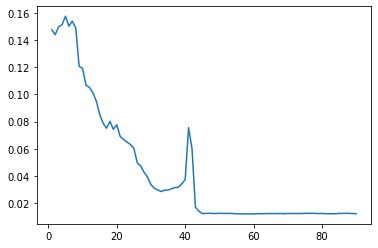

In [36]:
average_errors2 = []
for col in test_errors_df2.transpose():
    average_errors2.append(test_errors_df2.transpose()[col].mean())
sns.lineplot(x=[i for i in range(1, 91)], y=average_errors2)
plt.show()

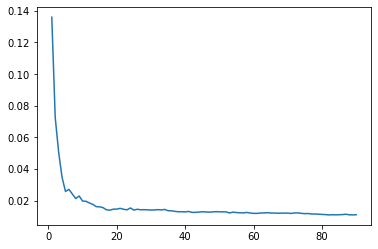

In [37]:
average_errors1 = []
for col in test_errors_df.transpose():
    average_errors1.append(test_errors_df.transpose()[col].mean())
    
sns.lineplot(x=[i for i in range(1, 91)], y=average_errors1)
plt.show()

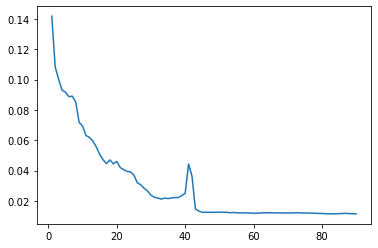

In [38]:
tot_avg_errors = []
for i in range(len(average_errors2)):
    tot_avg_errors.append((average_errors1[i] + average_errors2[i]) / 2)
sns.lineplot(x=[i for i in range(1, 91)], y=tot_avg_errors)
plt.show()